[View in Colaboratory](https://colab.research.google.com/github/KenJiangg/Exploring-Datasets/blob/master/Olympics_.ipynb)

I am working on Google Colab. so I need to add this in order to access the files 

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


Get the libraries needed for data analysis 

In [0]:
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')


read the data

In [0]:
data = pd.read_csv('drive/My Drive/Kaggle/Olympics Dataset/athlete_events.csv')
regions = pd.read_csv('drive/My Drive/Kaggle/Olympics Dataset/noc_regions.csv')

In [4]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [0]:
merged = pd.merge(data, regions, on='NOC', how='left')

merge data

In [7]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [0]:
merged=merged[np.isfinite(merged['Age'])]

check for null

In [9]:
merged.isnull().any()

ID        False
Name      False
Sex       False
Age       False
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

# Investigating the comparison between Age and Medals in the Olympics

This graph plots the age distribution for medalling in the olympics

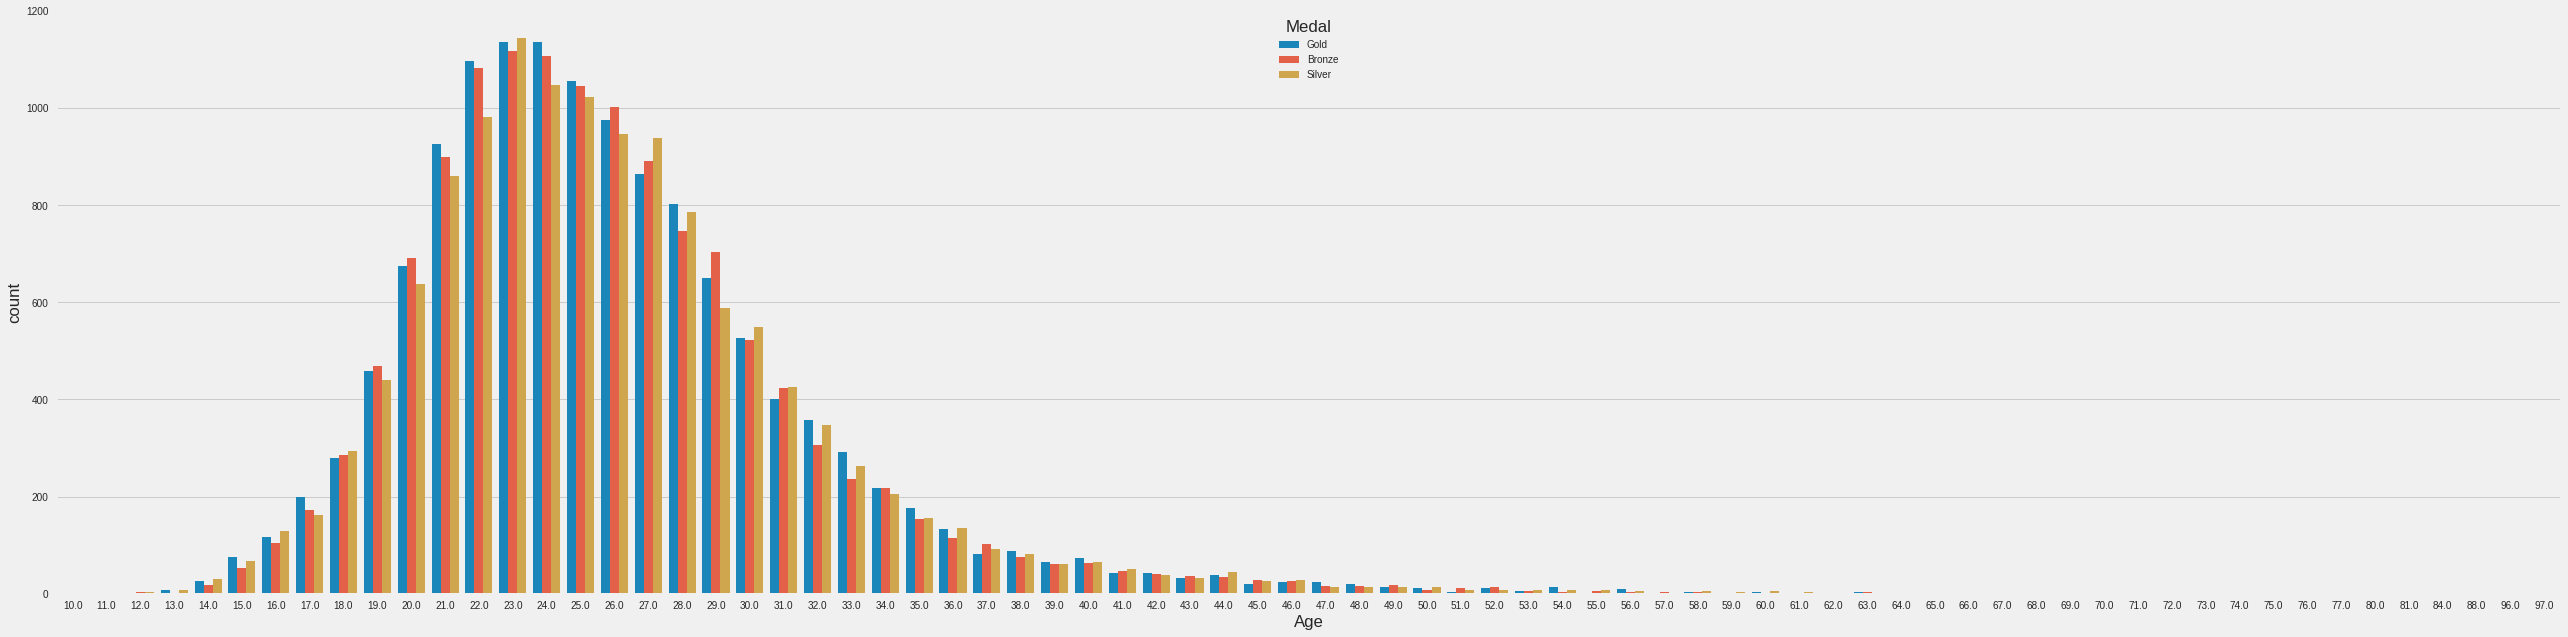

In [10]:
plt.figure(figsize=(40,10))
plt.tight_layout()
ax=sns.countplot(x='Age',hue='Medal',data=merged)

I'm looking for a similar sample size to compare old and young.

In [11]:
merged['ID'][merged['Age']>45].count()

3822

In [12]:
merged['ID'][merged['Age']<16].count()

3280

created two separate datasets that only have ages above 45 and ages below 16

In [0]:
oldSports=merged['Sport'][merged['Age']>45]
youngSports=merged['Sport'][merged['Age']<16]

plots what competitions have the most placements for being above the age of 45

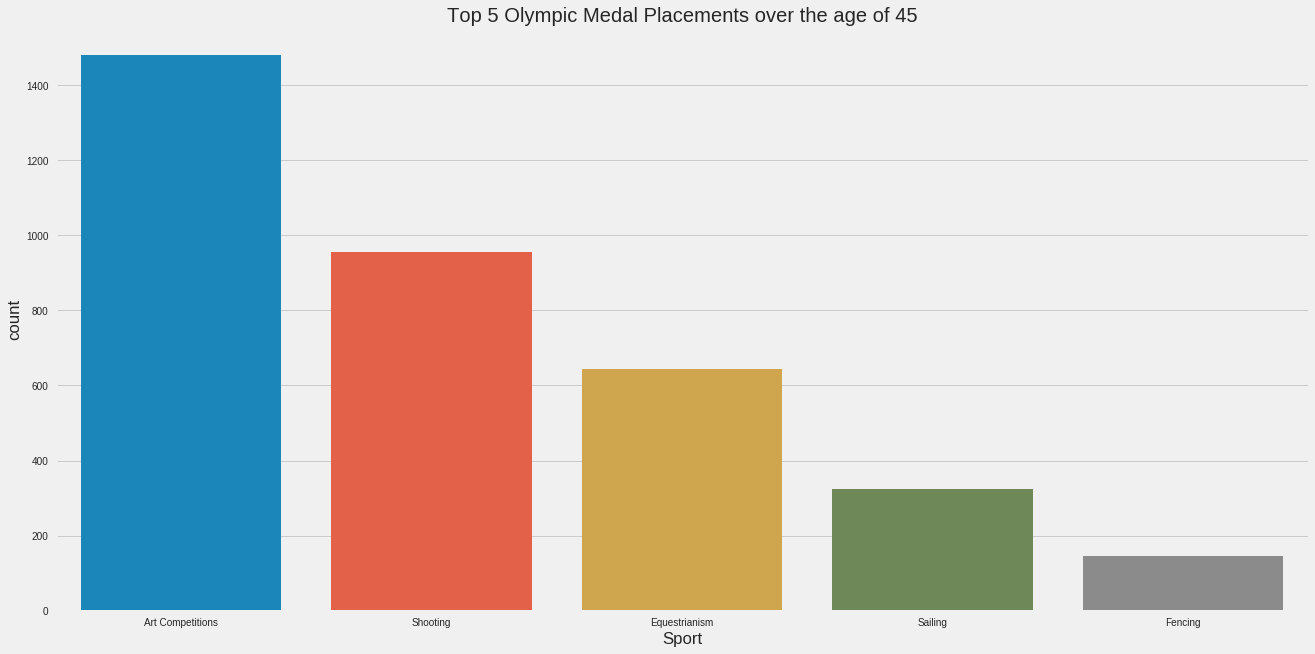

In [14]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('Top 5 Olympic Medal Placements over the age of 45')
sns.countplot(oldSports,order=oldSports.value_counts().iloc[:5].index)

plots what competitions have the most medals with people under the age of 16 

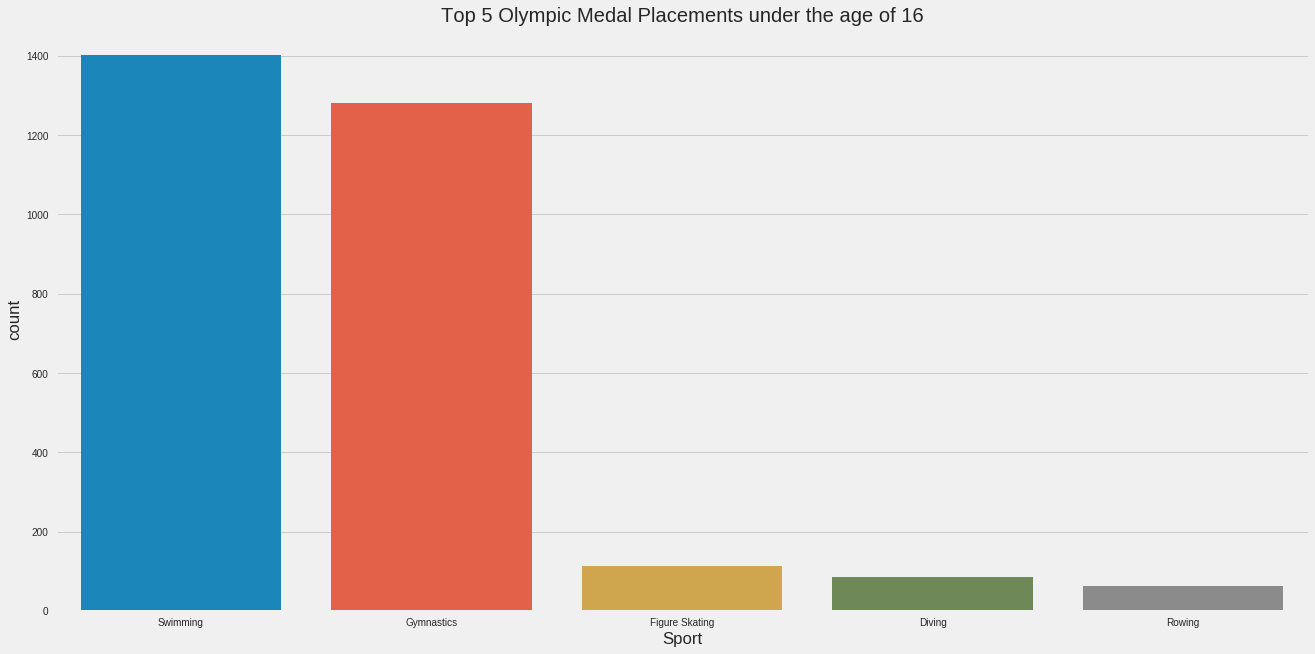

In [15]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('Top 5 Olympic Medal Placements under the age of 16')
sns.countplot(youngSports,order=youngSports.value_counts().iloc[:5].index)

# Swimming (1st most medals for olympians under 14 )

Let's investigate the swimming medalling 

In [0]:
swimSport=merged[merged['Sport']=='Swimming']

In [17]:
swimSport.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,Finland,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN


let's get similar sample sizes for "old" swimmers and "young " swimmers

In [18]:
swimSport['ID'][swimSport['Age']>32].count()

115

In [19]:
swimSport['ID'][swimSport['Age']<14].count()

135

In [0]:
oldSwimSport=swimSport['Event'][swimSport['Age']>32]
youngSwimSport=swimSport['Event'][swimSport['Age']<14]

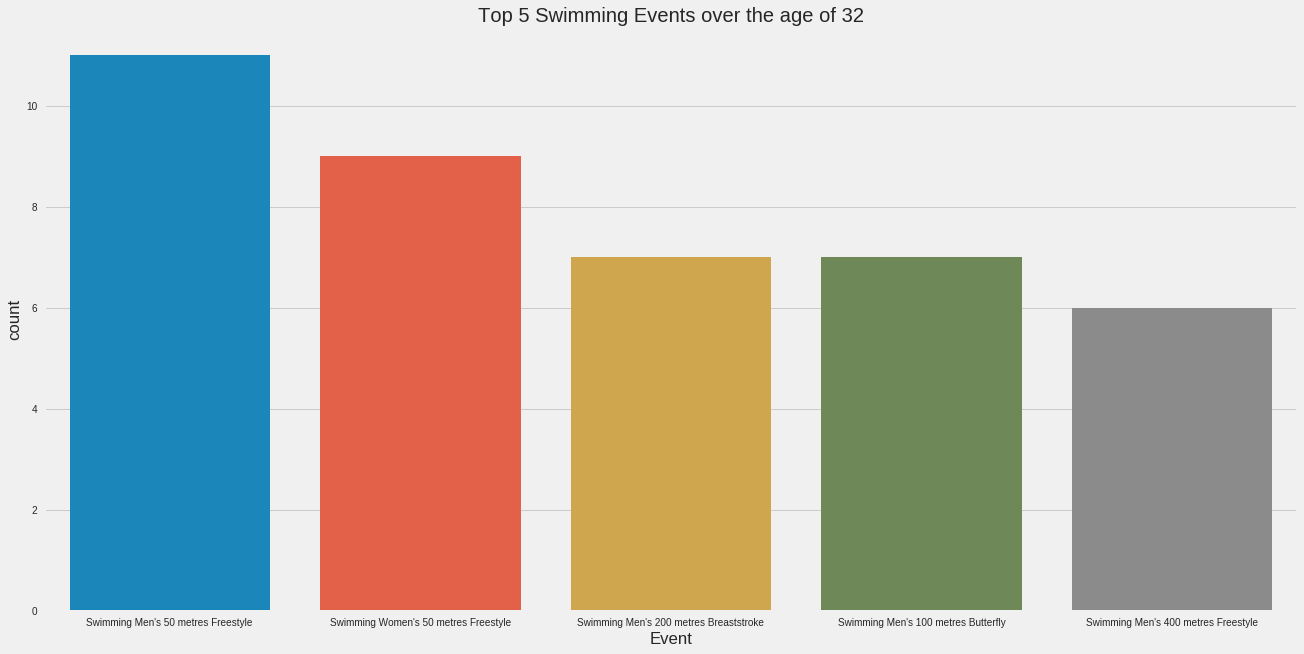

In [21]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('Top 5 Swimming Events over the age of 32')
sns.countplot(oldSwimSport,order=oldSwimSport.value_counts().iloc[:5].index)

"Old" swimmers are medalling in shorter events such as the 50 metres freestyle or 100 metres butterfly. Maybe the older swimmers have less endurance and can't swim at a fast pace for a longer period of time. 

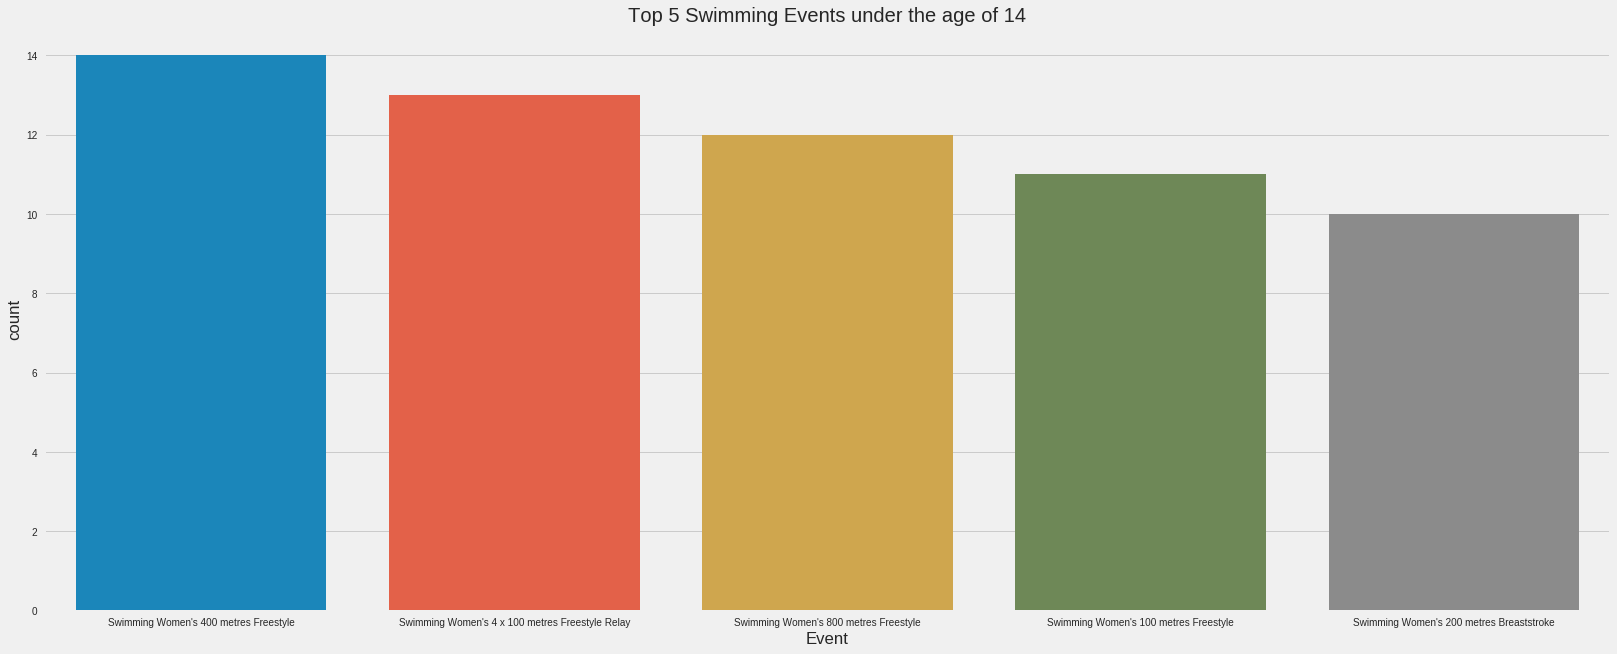

In [22]:
plt.figure(figsize=(25,10))
plt.tight_layout()
plt.title('Top 5 Swimming Events under the age of 14')
sns.countplot(youngSwimSport,order=youngSwimSport.value_counts().iloc[:5].index)

Most of the swimming events that U14 medal in are usually women events. A possible reason for this is that women mature faster and therefore the athletic ability difference between ages is less relevant. 

# Shooting (2nd most medals for olympians over 45)

In [23]:
shootSport=merged[merged['Sport']=='Shooting']
shootSport.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
124,45,Hakon Aasns,M,41.0,NaN,NaN,Norway,NOR,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",NaN,Norway,NaN
125,46,Hans Aasns,M,33.0,194.0,93.0,Norway,NOR,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN,Norway,NaN
126,46,Hans Aasns,M,45.0,194.0,93.0,Norway,NOR,1948 Summer,1948,Summer,London,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN,Norway,NaN
127,46,Hans Aasns,M,49.0,194.0,93.0,Norway,NOR,1952 Summer,1952,Summer,Helsinki,Shooting,Shooting Men's Trap,NaN,Norway,NaN
128,46,Hans Aasns,M,53.0,194.0,93.0,Norway,NOR,1956 Summer,1956,Summer,Melbourne,Shooting,Shooting Men's Trap,NaN,Norway,NaN


In [24]:
shootSport['ID'][shootSport['Age']>48].count()

558

In [25]:
shootSport['ID'][shootSport['Age']<22].count()

673